<a href="https://colab.research.google.com/github/0ace-jk/atividades_ebac/blob/main/Mod_07_Tarefa_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df_encoded = pd.read_csv('demo01_encoded.csv')

In [3]:
X = df_encoded.drop(columns=['Unnamed: 0', 'mau'], axis=1)
y = df_encoded.mau

In [4]:
display(X.shape)
display(y.shape)

(6770, 28)

(6770,)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [6]:
display(X_train, X_test, y_train, y_test)

sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos      idade  \
4531     0                 1                0           1  39.654795   
326      1                 0                1           1  29.052055   
4729     1                 0                0           0  31.200000   
6361     1                 0                1           0  53.290411   
2101     1                 0                1           0  64.909589   
...    ...               ...              ...         ...        ...   
6026     0                 0                0           0  28.994521   
79       1                 0                0           0  47.326027   
3927     0                 1                0           0  34.687671   
5955     1                 0                0           1  41.435616   
5640     1                 0                0           1  27.175342   

      tempo_emprego  possui_celular  possui_fone_comercial  possui_fone  \
4531       2.767123               1                      1            0   
326        6.504110               1                      0            0   
4729      11.416438               1                      0            0   
6361       0.761644               1                      0            0   
2101   -1000.665753               1                      0            0   
...             ...             ...                    ...          ...   
6026       3.550685               1                      0            0   
79         3.693151               1                      0            1   
3927       1.098630               1                      0            0   
5955       1.964384               1                      0            1   
5640       3.287671               1                      1            1   

      possui_email  ...  educacao_Secondary / secondary special  \
4531             0  ...                                    True   
326              0  ...                                   False   
4729             0  ...                                   False   
6361             0  ...                                    True   
2101             0  ...                                    True   
...            ...  ...                                     ...   
6026             0  ...                                    True   
79               0  ...                                   False   
3927             0  ...                                    True   
5955             0  ...                                    True   
5640             0  ...                                    True   

      estado_civil_Married  estado_civil_Separated  \
4531                  True                   False   
326                  False                   False   
4729                  True                   False   
6361                 False                    True   
2101                 False                   False   
...                    ...                     ...   
6026                  True                   False   
79                    True                   False   
3927                 False                   False   
5955                 False                   False   
5640                  True                   False   

      estado_civil_Single / not married  estado_civil_Widow  \
4531                              False               False   
326                               False               False   
4729                              False               False   
6361                              False               False   
2101                              False                True   
...                                 ...                 ...   
6026                              False               False   
79                                False               False   
3927                              False               False   
5955                               True               False   
5640                              False               False   

      tipo_residencia_House /

sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos      idade  \
115      1                 0                0           0  63.832877   
1147     1                 0                0           0  56.994521   
6019     1                 0                0           0  37.512329   
1750     1                 1                1           0  34.723288   
5152     1                 1                1           0  40.575342   
...    ...               ...              ...         ...        ...   
4442     1                 0                1           0  49.347945   
2061     1                 0                1           0  66.172603   
2160     1                 0                1           0  40.986301   
5161     0                 1                1           1  27.290411   
3960     1                 0                1           0  62.334247   

      tempo_emprego  possui_celular  possui_fone_comercial  possui_fone  \
115    -1000.665753               1                      0            1   
1147   -1000.665753               1                      0            0   
6019       0.547945               1                      0            1   
1750       1.797260               1                      0            0   
5152       4.534247               1                      0            0   
...             ...             ...                    ...          ...   
4442       1.926027               1                      0            0   
2061   -1000.665753               1                      0            0   
2160       7.849315               1                      0            0   
5161       4.863014               1                      0            0   
3960   -1000.665753               1                      0            0   

      possui_email  ...  educacao_Secondary / secondary special  \
115              0  ...                                    True   
1147             0  ...                                    True   
6019             0  ...                                   False   
1750             0  ...                                    True   
5152             0  ...                                   False   
...            ...  ...                                     ...   
4442             0  ...                                    True   
2061             0  ...                                    True   
2160             0  ...                                    True   
5161             0  ...                                   False   
3960             0  ...                                    True   

      estado_civil_Married  estado_civil_Separated  \
115                  False                    True   
1147                  True                   False   
6019                  True                   False   
1750                  True                   False   
5152                  True                   False   
...                    ...                     ...   
4442                 False                    True   
2061                 False                   False   
2160                  True                   False   
5161                  True                   False   
3960                  True                   False   

      estado_civil_Single / not married  estado_civil_Widow  \
115                               False               False   
1147                              False               False   
6019                              False               False   
1750                              False               False   
5152                              False               False   
...                                 ...                 ...   
4442                              False               False   
2061                               True               False   
2160                              False               False   
5161                              False               False   
3960                              False               False   

      tipo_residencia_House /

4531    False
326     False
4729    False
6361    False
2101    False
        ...  
6026    False
79      False
3927    False
5955    False
5640    False
Name: mau, Length: 4739, dtype: bool

115     False
1147    False
6019    False
1750    False
5152    False
        ...  
4442    False
2061    False
2160    False
5161    False
3960    False
Name: mau, Length: 2031, dtype: bool

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [7]:
clf_dt = DecisionTreeClassifier(random_state=100)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [8]:
plt.figure(figsize=(150, 60))
plot_tree(
    clf_dt,
    feature_names=X.columns,
    class_names=['Aprovado', 'Reprovado'],
    filled=True,
    fontsize=10);

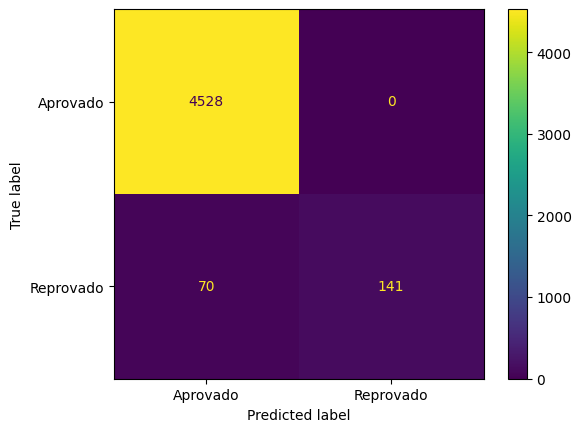

In [9]:
ConfusionMatrixDisplay.from_estimator(
    clf_dt,
    X_train,
    y_train,
    display_labels=['Aprovado', 'Reprovado'])

In [10]:
predict = clf_dt.predict(X_train)
accuracy_score(y_train, predict)
print(f'Acurácia na base de treinamento: {round(accuracy_score(y_train, predict), 4)*100} %')

Acurácia na base de treinamento: 98.52 %


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

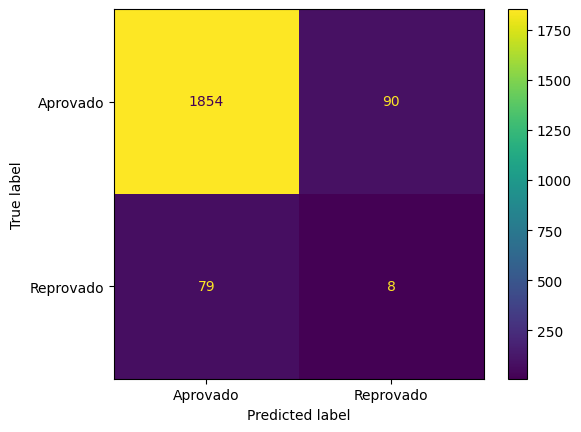

In [11]:
ConfusionMatrixDisplay.from_estimator(
    clf_dt,
    X_test,
    y_test,
    display_labels=['Aprovado', 'Reprovado'])

In [12]:
predict = clf_dt.predict(X_test)
accuracy_score(y_test, predict)
print(f'Acurácia na base de teste: {round(accuracy_score(y_test, predict) *100, 4)} %')
predict_train = clf_dt.predict(X_train)
accuracy_score(y_train, predict_train)
print(f'Acurácia na base de treinamento: {round(accuracy_score(y_train, predict_train) *100, 4)} %')

Acurácia na base de teste: 91.679 %
Acurácia na base de treinamento: 98.5229 %


In [13]:
clf_01 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_01.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [14]:
plt.figure(figsize=(150, 60))
plot_tree(
    clf_01,
    feature_names=X.columns,
    class_names=['Aprovado', 'Reprovado'],
    filled=True,
    fontsize=10);

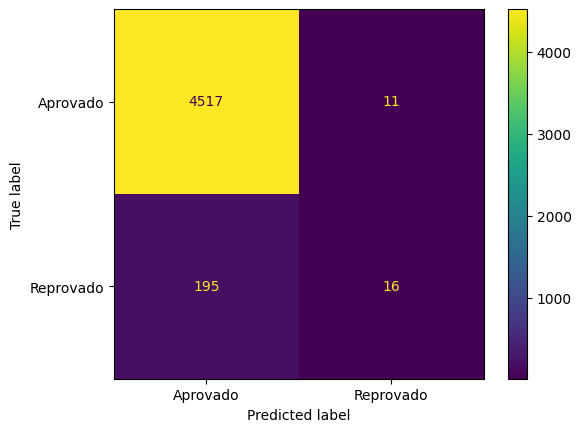

In [15]:
ConfusionMatrixDisplay.from_estimator(
    clf_01,
    X_train,
    y_train,
    display_labels=['Aprovado', 'Reprovado'])

In [16]:
predict = clf_01.predict(X_train)
accuracy_score(y_train, predict)
print(f'Acurácia na base de treinamento: {round(accuracy_score(y_train, predict), 4)*100} %')

Acurácia na base de treinamento: 95.65 %


In [17]:
predict = clf_01.predict(X_test)
accuracy_score(y_test, predict)
print(f'Acurácia na base de teste: {round(accuracy_score(y_test, predict), 4)*100} %')

Acurácia na base de teste: 95.37 %


In [18]:
print(f'Se classificassemos todos clientes como bons teriamos uma acuracia de: {round(y_train.value_counts(1).iloc[0] * 100, 4)} %')

Se classificassemos todos clientes como bons teriamos uma acuracia de: 95.5476 %
